# Import the Dependencies

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

# Loading the Dataset

In [32]:
wine = pd.read_csv("wine_data.csv", header = None, usecols = [0, 1, 2])
wine.columns = ["Class Label", "Alcohol", "Malic Acid"]

In [34]:
wine

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


# Checking the Distribution of the Dataset

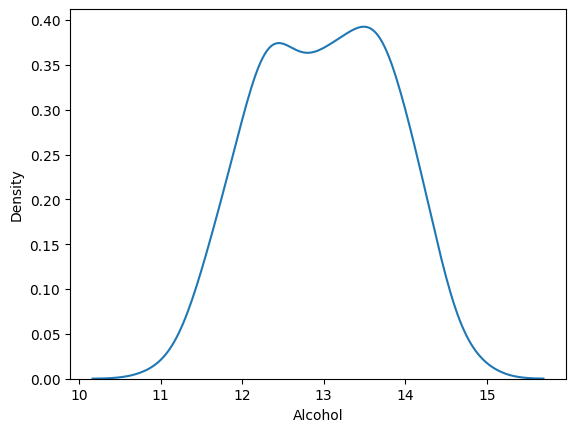

In [35]:
sns.kdeplot(wine["Alcohol"])
plt.show()

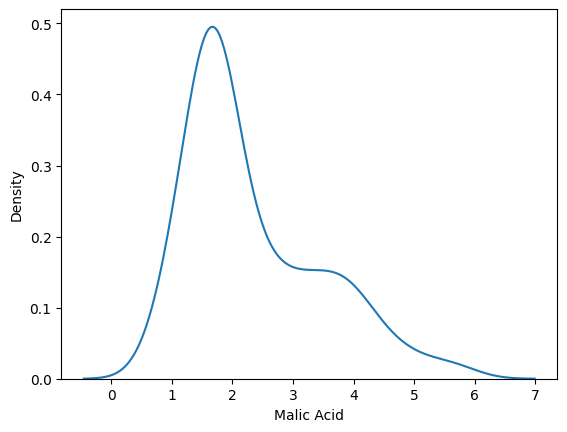

In [36]:
sns.kdeplot(wine["Malic Acid"])
plt.show()

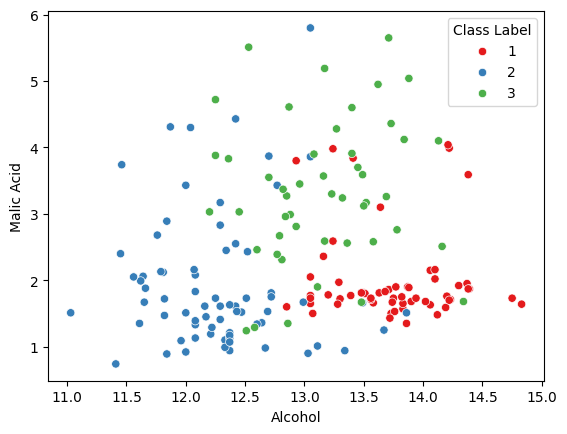

In [37]:
sns.scatterplot(data = wine, x = "Alcohol", y = "Malic Acid", 
                hue = "Class Label", palette = "Set1")
plt.show()

# Split the data into features and target

In [38]:
X = wine.drop("Class Label", axis = 1)
y = wine["Class Label"]

In [39]:
print(X.shape)
print(y.shape)

(178, 2)
(178,)


# Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
X.shape, X_train.shape, X_test.shape

((178, 2), (142, 2), (36, 2))

# Load the MinMaxScaler

In [42]:
scaler = MinMaxScaler()

# Fit the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Convert the scaled data into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [44]:
# First 5 rows of scaled trained data
X_train_scaled.head()

,Alcohol,Malic Acid
0,0.871053,0.160896
1,0.394737,0.940937
2,0.352632,0.036660
3,0.644737,0.158859
4,0.536842,0.124236


In [45]:
# First 5 rows of test scaled test data
X_test_scaled.head()

,Alcohol,Malic Acid
0,0.686842,0.450102
1,0.836842,0.641548
2,0.500000,0.391039
3,0.710526,0.124236
4,0.352632,0.057026


In [46]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [47]:
np.round(X_test_scaled.describe(), 1)

,Alcohol,Malic Acid
count,36.0,36.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.6,0.2
75%,0.7,0.4
max,0.9,0.8


# Effect of Scaling

#### Scatterplot

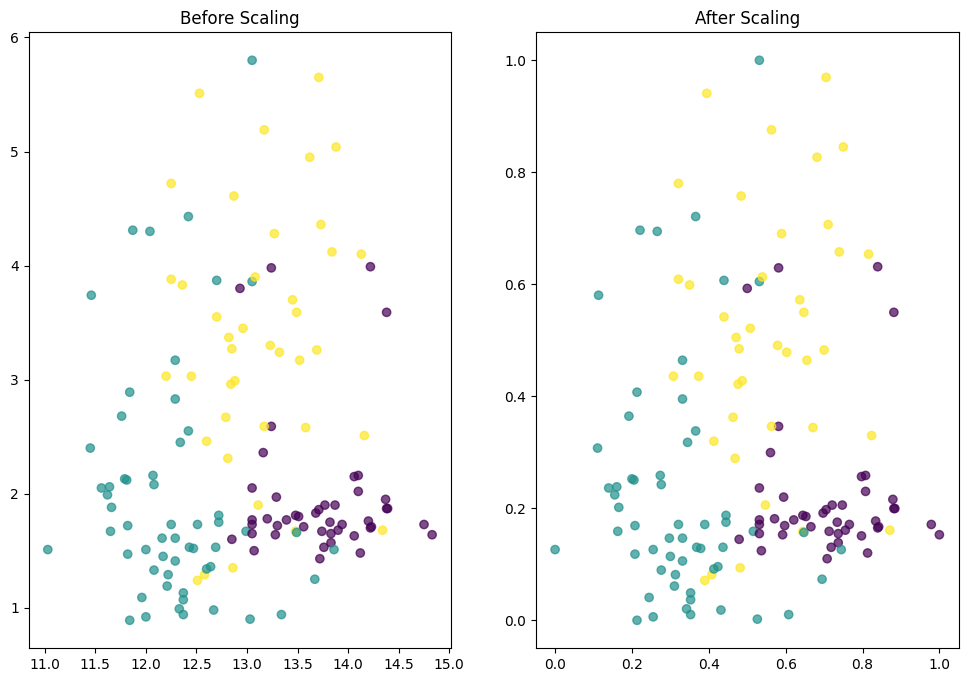

In [49]:
fig, axes = plt.subplots(1, 2, figsize = (12, 8))

axes[0].scatter(X_train["Alcohol"],
                X_train["Malic Acid"],
                c = y_train,
                cmap = "viridis",
                alpha = 0.7
)
axes[0].set_title("Before Scaling")

axes[1].scatter(X_train_scaled["Alcohol"],
                X_train_scaled["Malic Acid"],
                c = y_train,
                cmap = "viridis",
                alpha = 0.7
)
axes[1].set_title("After Scaling")
plt.show()

#### KDE Plot

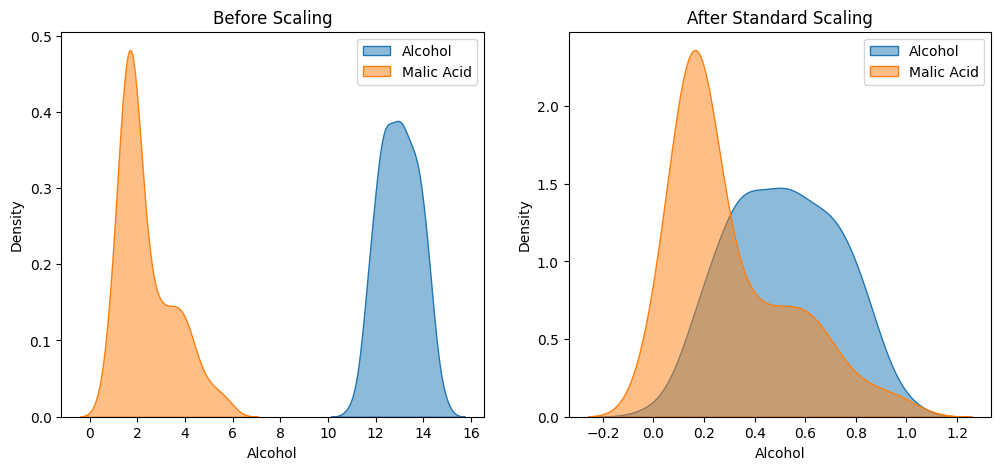

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Alcohol"], ax = ax1, label = "Alcohol", fill = True, alpha = 0.5)
sns.kdeplot(X_train["Malic Acid"], ax = ax1, label = "Malic Acid", fill = True, alpha = 0.5)
ax1.legend()

# After scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled["Alcohol"], ax = ax2, label = 'Alcohol', fill = True, alpha = 0.5)
sns.kdeplot(X_train_scaled["Malic Acid"], ax = ax2, label = "Malic Acid", fill = True, alpha = 0.5)
ax2.legend()

plt.show()

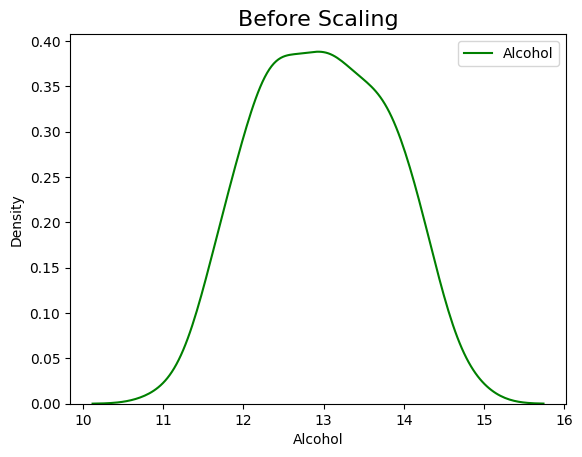

In [59]:
# Before scaling
sns.kdeplot(X_train["Alcohol"], label = "Alcohol", color = "green")
plt.title("Before Scaling", fontsize = 16)
plt.legend()
plt.show()

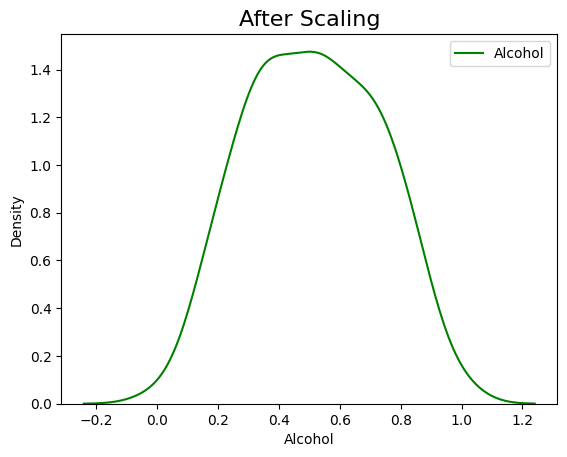

In [61]:
# After scaling
sns.kdeplot(X_train_scaled["Alcohol"], label = "Alcohol", color = "green")
plt.title("After Scaling", fontsize = 16)
plt.legend()
plt.show()